#TASK 1

Dataset first look:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate records: 1

Target variable balance:
target
1    164
0    138
Name: count, dtype: int64


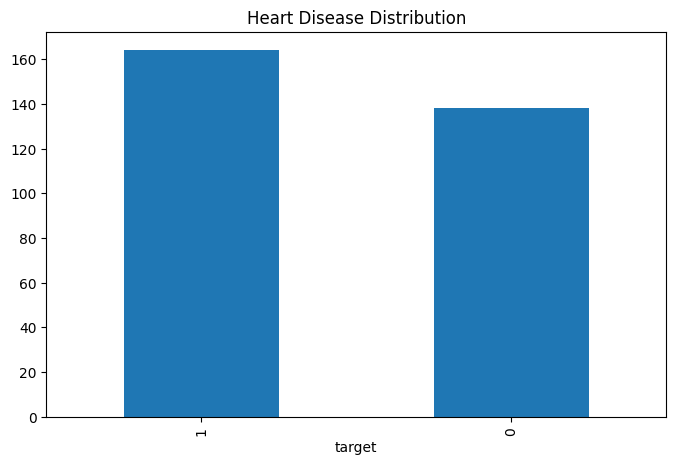


Model Results:
Random Forest - Train: 1.0000, Test: 0.8689
XGBoost - Train: 1.0000, Test: 0.8361
AdaBoost - Train: 0.9048, Test: 0.8525


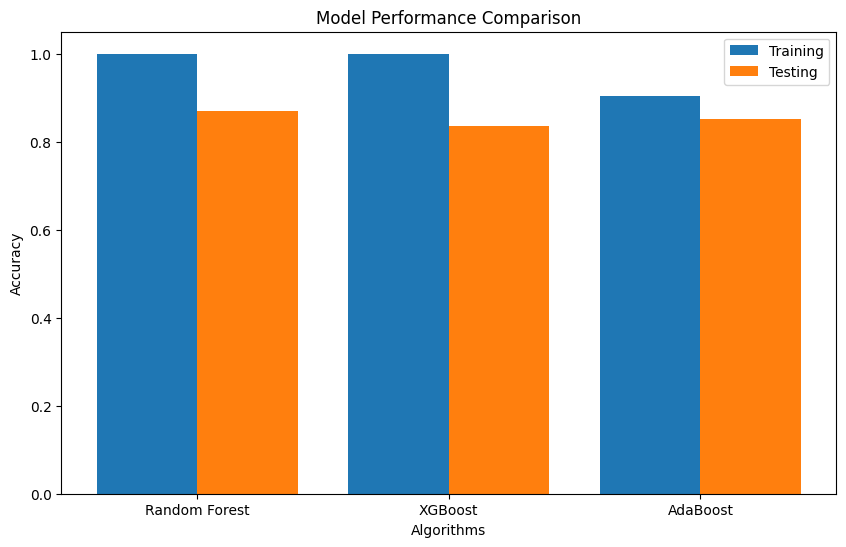

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('heart.csv')

print("Dataset first look:")
print(data.head())

print("\nMissing values:")
print(data.isnull().sum())

print("\nDuplicate records:", data.duplicated().sum())
data = data.drop_duplicates()

print("\nTarget variable balance:")
print(data['target'].value_counts())

plt.figure(figsize=(8,5))
data['target'].value_counts().plot(kind='bar')
plt.title('Heart Disease Distribution')
plt.show()

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)

rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
ada.fit(X_train_scaled, y_train)

rf_train_acc = accuracy_score(y_train, rf.predict(X_train_scaled))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test_scaled))

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train_scaled))
xgb_test_acc = accuracy_score(y_test, xgb.predict(X_test_scaled))

ada_train_acc = accuracy_score(y_train, ada.predict(X_train_scaled))
ada_test_acc = accuracy_score(y_test, ada.predict(X_test_scaled))

print("\nModel Results:")
print(f"Random Forest - Train: {rf_train_acc:.4f}, Test: {rf_test_acc:.4f}")
print(f"XGBoost - Train: {xgb_train_acc:.4f}, Test: {xgb_test_acc:.4f}")
print(f"AdaBoost - Train: {ada_train_acc:.4f}, Test: {ada_test_acc:.4f}")

plt.figure(figsize=(10,6))
models = ['Random Forest', 'XGBoost', 'AdaBoost']
train_scores = [rf_train_acc, xgb_train_acc, ada_train_acc]
test_scores = [rf_test_acc, xgb_test_acc, ada_test_acc]

x_pos = np.arange(len(models))
plt.bar(x_pos - 0.2, train_scores, 0.4, label='Training')
plt.bar(x_pos + 0.2, test_scores, 0.4, label='Testing')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x_pos, models)
plt.legend()
plt.show()

#TASK 2

Voting Classifier Results:
Hard Voting Accuracy: 0.7213
Soft Voting Accuracy: 0.7377
Best voting type: Soft
Best weights: [1, 1, 2, 1]
Best weighted accuracy: 0.7541


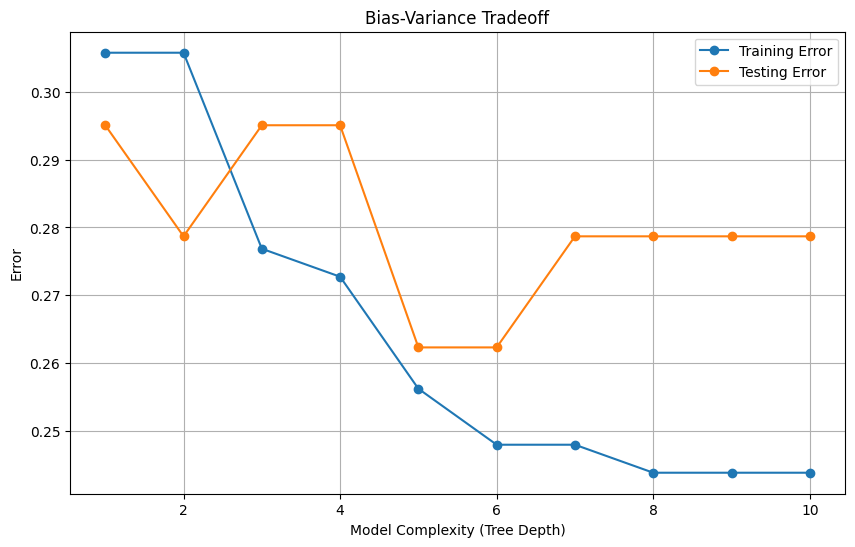

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('heart.csv')

X = data[['restecg', 'oldpeak']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)

hard_voter = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('rf', rf), ('xgb', xgb)],
    voting='hard'
)

soft_voter = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('rf', rf), ('xgb', xgb)],
    voting='soft'
)

hard_voter.fit(X_train_scaled, y_train)
soft_voter.fit(X_train_scaled, y_train)

hard_acc = accuracy_score(y_test, hard_voter.predict(X_test_scaled))
soft_acc = accuracy_score(y_test, soft_voter.predict(X_test_scaled))

print("Voting Classifier Results:")
print(f"Hard Voting Accuracy: {hard_acc:.4f}")
print(f"Soft Voting Accuracy: {soft_acc:.4f}")

best_voting_type = "Hard" if hard_acc > soft_acc else "Soft"
print(f"Best voting type: {best_voting_type}")

weights = [
    [1,1,1,1],
    [2,1,1,1],
    [1,2,1,1],
    [1,1,2,1],
    [1,1,1,2],
    [2,2,1,1]
]

best_weight = None
best_score = 0

for weight in weights:
    weighted_voter = VotingClassifier(
        estimators=[('dt', dt), ('knn', knn), ('rf', rf), ('xgb', xgb)],
        voting='soft',
        weights=weight
    )
    weighted_voter.fit(X_train_scaled, y_train)
    weight_acc = accuracy_score(y_test, weighted_voter.predict(X_test_scaled))

    if weight_acc > best_score:
        best_score = weight_acc
        best_weight = weight

print(f"Best weights: {best_weight}")
print(f"Best weighted accuracy: {best_score:.4f}")

train_errors = []
test_errors = []
depths = range(1, 11)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train_scaled, y_train)

    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)

    train_errors.append(1 - accuracy_score(y_train, train_pred))
    test_errors.append(1 - accuracy_score(y_test, test_pred))

plt.figure(figsize=(10,6))
plt.plot(depths, train_errors, label='Training Error', marker='o')
plt.plot(depths, test_errors, label='Testing Error', marker='o')
plt.xlabel('Model Complexity (Tree Depth)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

#TASK 3

Individual Model Performance:
Random Forest - Train: 0.8967, Test: 0.4754
AdaBoost - Train: 0.6116, Test: 0.6066
Voting Ensemble - Train: 0.8926, Test: 0.4754


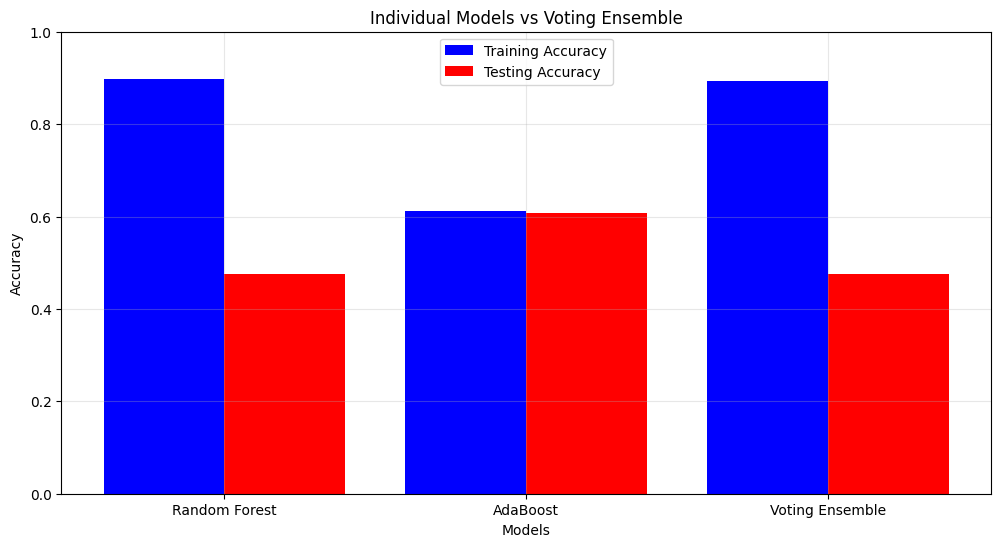

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('heart.csv')

X = data[['restecg', 'chol']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)

rf.fit(X_train_scaled, y_train)
ada.fit(X_train_scaled, y_train)

voter = VotingClassifier(
    estimators=[('rf', rf), ('ada', ada)],
    voting='soft'
)
voter.fit(X_train_scaled, y_train)

rf_train_acc = accuracy_score(y_train, rf.predict(X_train_scaled))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test_scaled))

ada_train_acc = accuracy_score(y_train, ada.predict(X_train_scaled))
ada_test_acc = accuracy_score(y_test, ada.predict(X_test_scaled))

voter_train_acc = accuracy_score(y_train, voter.predict(X_train_scaled))
voter_test_acc = accuracy_score(y_test, voter.predict(X_test_scaled))

print("Individual Model Performance:")
print(f"Random Forest - Train: {rf_train_acc:.4f}, Test: {rf_test_acc:.4f}")
print(f"AdaBoost - Train: {ada_train_acc:.4f}, Test: {ada_test_acc:.4f}")
print(f"Voting Ensemble - Train: {voter_train_acc:.4f}, Test: {voter_test_acc:.4f}")

plt.figure(figsize=(12,6))

models = ['Random Forest', 'AdaBoost', 'Voting Ensemble']
train_scores = [rf_train_acc, ada_train_acc, voter_train_acc]
test_scores = [rf_test_acc, ada_test_acc, voter_test_acc]

x_pos = np.arange(len(models))
plt.bar(x_pos - 0.2, train_scores, 0.4, label='Training Accuracy', color='blue')
plt.bar(x_pos + 0.2, test_scores, 0.4, label='Testing Accuracy', color='red')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Individual Models vs Voting Ensemble')
plt.xticks(x_pos, models)
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.show()